<a href="https://colab.research.google.com/github/radhika1603/INCLASSACTIVITIES/blob/main/MTA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from collections import defaultdict
import itertools
import numpy as np
import math

# Load the dataset
file_path = "/content/MTA dataset (1).csv"
df = pd.read_csv(file_path)

def first_touch_attribution(df):
    first_touch = defaultdict(float)
    for _, row in df.iterrows():
        path = row['path'].split(' > ')
        first_touch[path[0]] += row['total_conversions']
    return dict(first_touch)

def last_touch_attribution(df):
    last_touch = defaultdict(float)
    for _, row in df.iterrows():
        path = row['path'].split(' > ')
        last_touch[path[-1]] += row['total_conversions']
    return dict(last_touch)

def shapley_value_attribution(df):
    shapley_values = defaultdict(float)
    for _, row in df.iterrows():
        path = row['path'].split(' > ')
        n = len(path)
        for i, channel in enumerate(path):
            weight = 1 / (n * math.comb(n-1, i) if i > 0 else 1)
            shapley_values[channel] += weight * row['total_conversions']
    return dict(shapley_values)

def markov_chain_attribution(df):
    transitions = defaultdict(lambda: defaultdict(int))
    conversions = defaultdict(int)

    for _, row in df.iterrows():
        path = ['START'] + row['path'].split(' > ') + ['CONVERSION']
        for i in range(len(path) - 1):
            transitions[path[i]][path[i + 1]] += 1
        if row['total_conversions'] > 0:
            conversions[path[-2]] += row['total_conversions']

    # Convert transition counts to probabilities
    transition_probs = {k: {kk: v / sum(vv.values()) for kk, v in vv.items()} for k, vv in transitions.items()}

    return transition_probs

# Compute attributions
first_touch = first_touch_attribution(df)
last_touch = last_touch_attribution(df)
shapley_values = shapley_value_attribution(df)
markov_chain = markov_chain_attribution(df)

# Print results
print("First-Touch Attribution:", first_touch)
print("Last-Touch Attribution:", last_touch)
print("Shapley Values Attribution:", shapley_values)
print("Markov Chain Transition Probabilities:", markov_chain)


First-Touch Attribution: {'eta': 3164.0, 'iota': 4606.0, 'alpha': 6308.0, 'beta': 2831.0, 'theta': 1606.0, 'lambda': 902.0, 'gamma': 165.0, 'epsilon': 99.0, 'kappa': 74.0, 'zeta': 27.0, 'mi': 2.0, 'delta': 1.0}
Last-Touch Attribution: {'eta': 4167.0, 'iota': 3355.0, 'alpha': 8447.0, 'lambda': 1207.0, 'kappa': 230.0, 'beta': 989.0, 'theta': 653.0, 'epsilon': 531.0, 'gamma': 92.0, 'zeta': 107.0, 'delta': 5.0, 'mi': 2.0}
Shapley Values Attribution: {'eta': 4102.547044556725, 'iota': 5560.418808214013, 'alpha': 9704.822207331894, 'beta': 3133.441954336546, 'theta': 1845.3202564375447, 'lambda': 1124.956963409952, 'kappa': 140.47499182105793, 'zeta': 73.38070171405174, 'epsilon': 247.79132325206604, 'gamma': 196.8248366579304, 'delta': 2.1585137085137083, 'mi': 2.0277777777777777}
Markov Chain Transition Probabilities: {'START': {'eta': 0.2231, 'iota': 0.3103, 'alpha': 0.0375, 'beta': 0.2647, 'theta': 0.0868, 'lambda': 0.0451, 'gamma': 0.0135, 'epsilon': 0.0078, 'kappa': 0.0079, 'zeta': 0.0

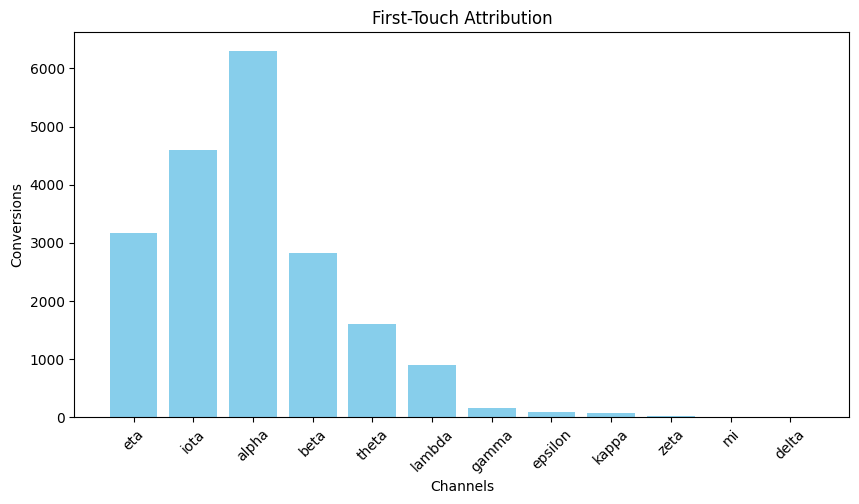

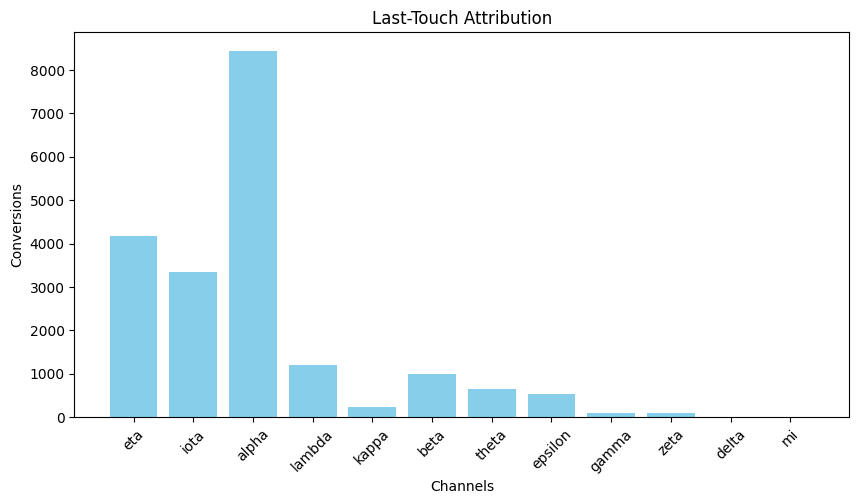

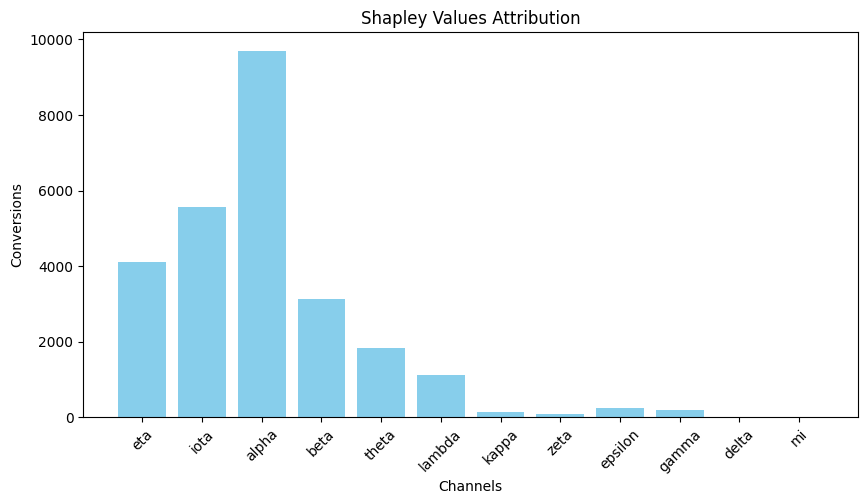

First-Touch Attribution: {'eta': 3164.0, 'iota': 4606.0, 'alpha': 6308.0, 'beta': 2831.0, 'theta': 1606.0, 'lambda': 902.0, 'gamma': 165.0, 'epsilon': 99.0, 'kappa': 74.0, 'zeta': 27.0, 'mi': 2.0, 'delta': 1.0}
Last-Touch Attribution: {'eta': 4167.0, 'iota': 3355.0, 'alpha': 8447.0, 'lambda': 1207.0, 'kappa': 230.0, 'beta': 989.0, 'theta': 653.0, 'epsilon': 531.0, 'gamma': 92.0, 'zeta': 107.0, 'delta': 5.0, 'mi': 2.0}
Shapley Values Attribution: {'eta': 4102.547044556725, 'iota': 5560.418808214013, 'alpha': 9704.822207331894, 'beta': 3133.441954336546, 'theta': 1845.3202564375447, 'lambda': 1124.956963409952, 'kappa': 140.47499182105793, 'zeta': 73.38070171405174, 'epsilon': 247.79132325206604, 'gamma': 196.8248366579304, 'delta': 2.1585137085137083, 'mi': 2.0277777777777777}
Markov Chain Transition Probabilities: {'START': {'eta': 0.2231, 'iota': 0.3103, 'alpha': 0.0375, 'beta': 0.2647, 'theta': 0.0868, 'lambda': 0.0451, 'gamma': 0.0135, 'epsilon': 0.0078, 'kappa': 0.0079, 'zeta': 0.0

In [4]:
import pandas as pd
from collections import defaultdict
import itertools
import numpy as np
import math
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/MTA dataset (1).csv"
df = pd.read_csv(file_path)

def first_touch_attribution(df):
    first_touch = defaultdict(float)
    for _, row in df.iterrows():
        path = row['path'].split(' > ')
        first_touch[path[0]] += row['total_conversions']
    return dict(first_touch)

def last_touch_attribution(df):
    last_touch = defaultdict(float)
    for _, row in df.iterrows():
        path = row['path'].split(' > ')
        last_touch[path[-1]] += row['total_conversions']
    return dict(last_touch)

def shapley_value_attribution(df):
    shapley_values = defaultdict(float)
    for _, row in df.iterrows():
        path = row['path'].split(' > ')
        n = len(path)
        for i, channel in enumerate(path):
            weight = 1 / (n * math.comb(n-1, i) if i > 0 else 1)
            shapley_values[channel] += weight * row['total_conversions']
    return dict(shapley_values)

def markov_chain_attribution(df):
    transitions = defaultdict(lambda: defaultdict(int))
    conversions = defaultdict(int)

    for _, row in df.iterrows():
        path = ['START'] + row['path'].split(' > ') + ['CONVERSION']
        for i in range(len(path) - 1):
            transitions[path[i]][path[i + 1]] += 1
        if row['total_conversions'] > 0:
            conversions[path[-2]] += row['total_conversions']

    # Convert transition counts to probabilities
    transition_probs = {k: {kk: v / sum(vv.values()) for kk, v in vv.items()} for k, vv in transitions.items()}

    return transition_probs

# Compute attributions
first_touch = first_touch_attribution(df)
last_touch = last_touch_attribution(df)
shapley_values = shapley_value_attribution(df)
markov_chain = markov_chain_attribution(df)

# Plot results
def plot_attribution(data, title):
    plt.figure(figsize=(10, 5))
    plt.bar(data.keys(), data.values(), color='skyblue')
    plt.xlabel('Channels')
    plt.ylabel('Conversions')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_attribution(first_touch, "First-Touch Attribution")
plot_attribution(last_touch, "Last-Touch Attribution")
plot_attribution(shapley_values, "Shapley Values Attribution")

# Print results
print("First-Touch Attribution:", first_touch)
print("Last-Touch Attribution:", last_touch)
print("Shapley Values Attribution:", shapley_values)
print("Markov Chain Transition Probabilities:", markov_chain)

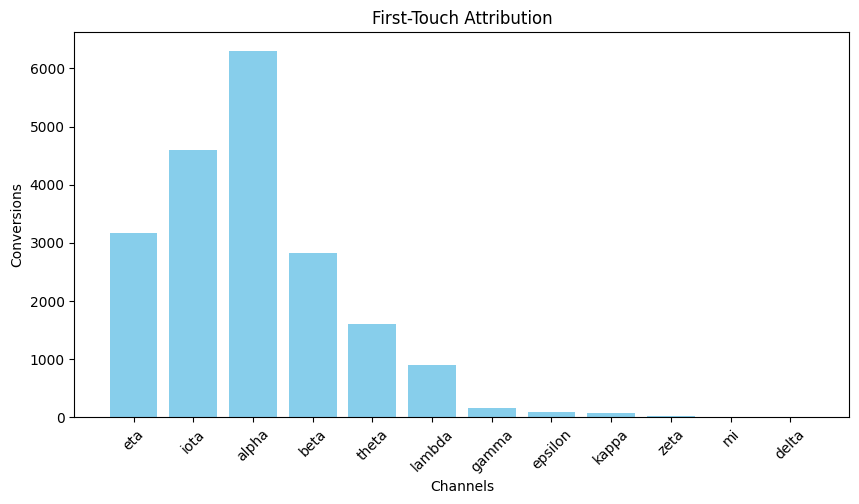

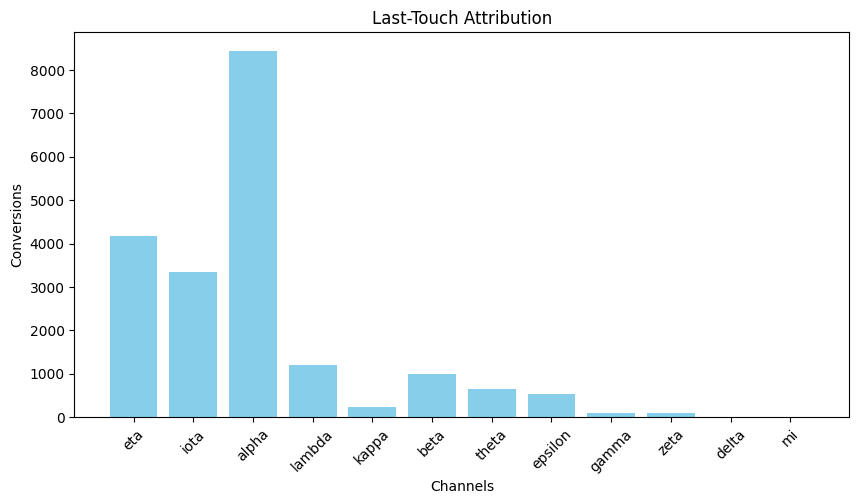

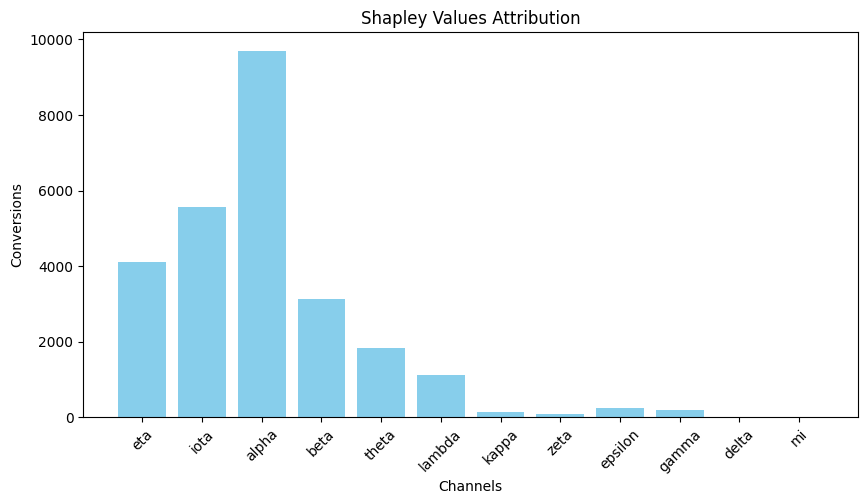

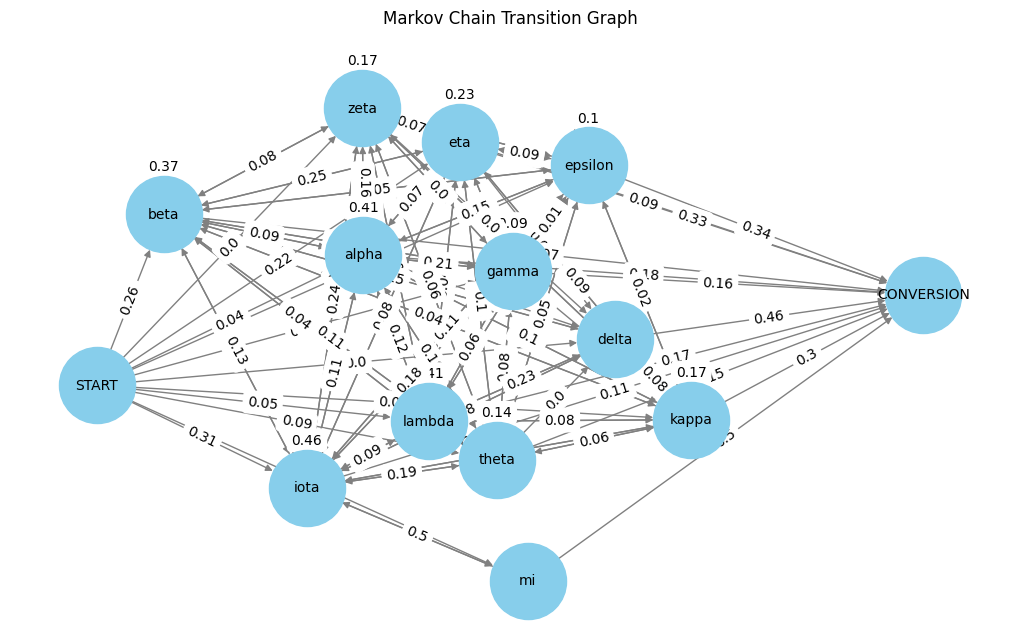

First-Touch Attribution: {'eta': 3164.0, 'iota': 4606.0, 'alpha': 6308.0, 'beta': 2831.0, 'theta': 1606.0, 'lambda': 902.0, 'gamma': 165.0, 'epsilon': 99.0, 'kappa': 74.0, 'zeta': 27.0, 'mi': 2.0, 'delta': 1.0}
Last-Touch Attribution: {'eta': 4167.0, 'iota': 3355.0, 'alpha': 8447.0, 'lambda': 1207.0, 'kappa': 230.0, 'beta': 989.0, 'theta': 653.0, 'epsilon': 531.0, 'gamma': 92.0, 'zeta': 107.0, 'delta': 5.0, 'mi': 2.0}
Shapley Values Attribution: {'eta': 4102.547044556725, 'iota': 5560.418808214013, 'alpha': 9704.822207331894, 'beta': 3133.441954336546, 'theta': 1845.3202564375447, 'lambda': 1124.956963409952, 'kappa': 140.47499182105793, 'zeta': 73.38070171405174, 'epsilon': 247.79132325206604, 'gamma': 196.8248366579304, 'delta': 2.1585137085137083, 'mi': 2.0277777777777777}
Markov Chain Transition Probabilities: {'START': {'eta': 0.2231, 'iota': 0.3103, 'alpha': 0.0375, 'beta': 0.2647, 'theta': 0.0868, 'lambda': 0.0451, 'gamma': 0.0135, 'epsilon': 0.0078, 'kappa': 0.0079, 'zeta': 0.0

In [6]:
import pandas as pd
from collections import defaultdict
import itertools
import numpy as np
import math
import matplotlib.pyplot as plt
import networkx as nx

# Load the dataset
file_path = "/content/MTA dataset (1).csv"
df = pd.read_csv(file_path)

def first_touch_attribution(df):
    first_touch = defaultdict(float)
    for _, row in df.iterrows():
        path = row['path'].split(' > ')
        first_touch[path[0]] += row['total_conversions']
    return dict(first_touch)

def last_touch_attribution(df):
    last_touch = defaultdict(float)
    for _, row in df.iterrows():
        path = row['path'].split(' > ')
        last_touch[path[-1]] += row['total_conversions']
    return dict(last_touch)

def shapley_value_attribution(df):
    shapley_values = defaultdict(float)
    for _, row in df.iterrows():
        path = row['path'].split(' > ')
        n = len(path)
        for i, channel in enumerate(path):
            weight = 1 / (n * math.comb(n-1, i) if i > 0 else 1)
            shapley_values[channel] += weight * row['total_conversions']
    return dict(shapley_values)

def markov_chain_attribution(df):
    transitions = defaultdict(lambda: defaultdict(int))
    conversions = defaultdict(int)

    for _, row in df.iterrows():
        path = ['START'] + row['path'].split(' > ') + ['CONVERSION']
        for i in range(len(path) - 1):
            transitions[path[i]][path[i + 1]] += 1
        if row['total_conversions'] > 0:
            conversions[path[-2]] += row['total_conversions']

    # Convert transition counts to probabilities
    transition_probs = {k: {kk: v / sum(vv.values()) for kk, v in vv.items()} for k, vv in transitions.items()}

    return transition_probs

# Compute attributions
first_touch = first_touch_attribution(df)
last_touch = last_touch_attribution(df)
shapley_values = shapley_value_attribution(df)
markov_chain = markov_chain_attribution(df)

# Plot results
def plot_attribution(data, title):
    plt.figure(figsize=(10, 5))
    plt.bar(data.keys(), data.values(), color='skyblue')
    plt.xlabel('Channels')
    plt.ylabel('Conversions')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

def plot_markov_chain(transition_probs):
    G = nx.DiGraph()
    for node, edges in transition_probs.items():
        for target, weight in edges.items():
            G.add_edge(node, target, weight=round(weight, 2))

    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', edge_color='gray', font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Markov Chain Transition Graph")
    plt.show()

plot_attribution(first_touch, "First-Touch Attribution")
plot_attribution(last_touch, "Last-Touch Attribution")
plot_attribution(shapley_values, "Shapley Values Attribution")
plot_markov_chain(markov_chain)

# Print results
print("First-Touch Attribution:", first_touch)
print("Last-Touch Attribution:", last_touch)
print("Shapley Values Attribution:", shapley_values)
print("Markov Chain Transition Probabilities:", markov_chain)
